# **Introduction to Data Science Workshop Mini-Project**

### **Part 1: Introduction to Programming Tools**
Loading Dataset

In [1]:
# Import libraries
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [2]:
# Upload dataset
from google.colab import files
uploaded = files.upload()

Saving chicago_dataset.csv to chicago_dataset.csv


In [28]:
# Load dataset
dataset = pd.read_csv(io.StringIO(uploaded['chicago_dataset.csv'].decode('utf-8')))
dataset.head()

,Community Area,Per Capita Income,Unemployment,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Birth Rate,Low Birth Weight,Prenatal Care,Preterm Births,Teen Birth Rate,Lung Cancer,Breast Cancer in Females,Prostate Cancer in Males,Diabetes,Stroke,Tuberculosis,Firearm
0,Rogers Park,23714,7.5,22.7,7.9,28.8,18.1,16.4,11.0,73.0,11.2,40.8,36.7,23.3,21.7,77.1,33.7,11.4,5.2
1,West Ridge,21375,7.9,15.1,7.0,38.3,19.6,17.3,8.1,71.1,8.3,29.9,36.0,20.2,14.2,60.5,34.7,8.9,3.7
2,Uptown,32355,7.7,22.7,4.6,22.2,13.6,13.1,8.3,77.7,10.3,35.1,50.5,21.3,25.2,80.0,41.7,13.6,4.6
3,Lincoln Square,35503,6.8,9.5,3.1,25.6,12.5,17.1,8.1,80.5,9.7,38.4,43.1,21.7,27.6,55.4,36.9,8.5,6.1
4,North Center,51615,4.5,7.1,0.2,25.5,5.4,22.4,9.1,80.4,9.8,8.4,42.4,16.6,15.1,49.8,41.6,1.9,1.0


**What is your assigned variable?**

*ANSWER*: Crowded Housing

### **Part 2: Descriptive Statistics**
Computing Mean, Median, and Quartiles

In [4]:
# Compute the mean of your assigned variable
print(dataset["Crowded Housing"].mean())

4.9129870129870135


In [5]:
# Compute the median of your assigned variable
print(dataset['Crowded Housing'].median())

4.2


In [8]:
print(dataset['Crowded Housing'].mode())

0    0.6
1    2.0
2    4.8
Name: Crowded Housing, dtype: float64


In [7]:
# Compute the first, second, and third quartile of your assigned variable
print('Q1: ', np.percentile(dataset['Crowded Housing'], 25))
print('Q2: ', np.percentile(dataset['Crowded Housing'], 50))
print('Q3: ', np.percentile(dataset['Crowded Housing'], 75))

Q1:  2.0
Q2:  4.2
Q3:  6.8


In [14]:
print(dataset['Crowded Housing'].quantile([0.25, 0.5, 0.75]))

0.25    2.0
0.50    4.2
0.75    6.8
Name: Crowded Housing, dtype: float64


In [6]:
# Compute all descriptive statistics for Chicago's community areas
dataset.describe()

,Per Capita Income,Unemployment,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Birth Rate,Low Birth Weight,Prenatal Care,Preterm Births,Teen Birth Rate,Lung Cancer,Breast Cancer in Females,Prostate Cancer in Males,Diabetes,Stroke,Tuberculosis,Firearm
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,25106.740260,13.303896,20.292208,4.912987,35.829870,21.596104,15.698701,10.101299,76.954545,11.264935,50.064935,51.481818,25.951948,36.805195,71.937662,46.544156,6.844156,16.731169
std,14952.672297,7.031965,11.496988,3.657341,7.269802,12.354995,3.528735,3.913926,5.245714,3.016916,28.097817,16.439928,9.557590,20.595189,21.497999,14.448570,4.587956,14.462222
min,8535.000000,4.200000,3.100000,0.200000,15.500000,2.900000,9.400000,3.500000,63.600000,5.000000,1.300000,15.900000,7.600000,0.000000,26.800000,22.000000,0.000000,1.000000
25%,15467.000000,7.800000,12.000000,2.000000,32.300000,13.400000,12.900000,7.300000,73.300000,8.800000,33.700000,37.700000,20.200000,19.700000,58.600000,37.900000,3.000000,5.500000
50%,20489.000000,11.500000,18.200000,4.200000,38.300000,18.500000,15.700000,8.700000,76.100000,10.800000,49.200000,50.000000,24.000000,32.100000,73.000000,43.100000,6.500000,10.600000
75%,29026.000000,17.400000,26.100000,6.800000,40.900000,29.400000,18.500000,12.700000,80.400000,13.700000,67.900000,63.800000,32.700000,51.400000,83.900000,53.500000,9.400000,25.800000
max,87163.000000,40.000000,61.400000,17.600000,50.200000,58.700000,22.400000,19.700000,94.500000,17.500000,116.900000,89.600000,54.700000,92.900000,119.100000,99.100000,22.700000,70.300000


**What is the mean, median, first, second, and third quartile of your assigned variable?**

*ANSWER*: ...

### **Part 3: Data Visualization**
Making Bar Charts, Scatter Plots, and Boxplots

In [29]:
# Sort dataset by your assigned variable
dataset = dataset.sort_values(by= 'Crowded Housing', ascending=False)
dataset.head()

,Community Area,Per Capita Income,Unemployment,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Birth Rate,Low Birth Weight,Prenatal Care,Preterm Births,Teen Birth Rate,Lung Cancer,Breast Cancer in Females,Prostate Cancer in Males,Diabetes,Stroke,Tuberculosis,Firearm
29,South Lawndale,10697,11.5,28.1,17.6,33.1,58.7,19.5,7.6,85.1,9.6,77.5,15.9,13.2,32.7,65.0,37.3,7.9,8.6
62,Gage Park,12014,14.0,20.8,17.4,40.4,54.1,21.8,6.8,80.4,6.8,61.4,34.1,23.4,41.1,65.0,51.2,7.0,11.1
57,Brighton Park,13138,11.2,23.0,13.2,39.8,48.2,20.6,7.2,82.7,8.3,58.1,27.7,26.8,15.1,69.7,38.3,11.5,10.6
60,New City,12524,17.4,30.6,12.2,42.0,42.4,21.4,11.8,75.9,12.2,94.3,69.4,23.6,40.7,83.7,50.2,9.3,24.6
13,Albany Park,20355,9.0,17.1,11.2,32.1,34.9,18.3,8.5,73.3,8.3,44.5,36.9,22.9,13.1,72.1,39.1,16.8,5.3


In [21]:
dataset.corr()

<ipython-input-21-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Per Capita Income,Unemployment,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Birth Rate,Low Birth Weight,Prenatal Care,Preterm Births,Teen Birth Rate,Lung Cancer,Breast Cancer in Females,Prostate Cancer in Males,Diabetes,Stroke,Tuberculosis,Firearm
Per Capita Income,1.000000,-0.610553,-0.526518,-0.545204,-0.756579,-0.707354,-0.377653,-0.394564,0.200858,-0.364807,-0.647128,-0.383833,-0.082305,-0.363934,-0.601869,-0.482252,-0.276431,-0.496859
Unemployment,-0.610553,1.000000,0.763817,0.144304,0.604999,0.322902,0.149439,0.702227,-0.542603,0.646550,0.713014,0.710072,0.265807,0.715138,0.699122,0.724424,0.081567,0.722577
Below Poverty Level,-0.526518,0.763817,1.000000,0.323242,0.401354,0.422382,0.249764,0.681049,-0.516145,0.550906,0.660038,0.515900,0.102502,0.551339,0.644337,0.568643,0.362046,0.565760
Crowded Housing,-0.545204,0.144304,0.323242,1.000000,0.244450,0.905274,0.603219,-0.080532,-0.074951,-0.140244,0.448399,-0.235994,-0.171915,-0.052092,0.147130,0.050471,0.382750,0.034451
Dependency,-0.756579,0.604999,0.401354,0.244450,1.000000,0.424356,0.115771,0.479581,-0.192405,0.571350,0.517878,0.491954,0.253794,0.445309,0.513186,0.494460,-0.048118,0.590796
No High School Diploma,-0.707354,0.322902,0.422382,0.905274,0.424356,1.000000,0.594249,0.056962,-0.078027,-0.023655,0.537782,-0.058539,-0.184555,0.056325,0.274913,0.171804,0.381066,0.131254
Birth Rate,-0.377653,0.149439,0.249764,0.603219,0.115771,0.594249,1.000000,0.108179,-0.178847,0.004334,0.612710,-0.063567,-0.022201,0.130114,0.303831,0.126423,0.279755,0.162722
Low Birth Weight,-0.394564,0.702227,0.681049,-0.080532,0.479581,0.056962,0.108179,1.000000,-0.532546,0.843100,0.622936,0.671295,0.425041,0.713754,0.664107,0.525439,0.125231,0.671880
Prenatal Care,0.200858,-0.542603,-0.516145,-0.074951,-0.192405,-0.078027,-0.178847,-0.532546,1.000000,-0.413383,-0.579170,-0.353354,-0.142970,-0.430259,-0.470152,-0.395817,-0.270147,-0.540972
Preterm Births,-0.364807,0.646550,0.550906,-0.140244,0.571350,-0.023655,0.004334,0.843100,-0.413383,1.000000,0.549843,0.675119,0.435020,0.642100,0.650790,0.539608,0.001197,0.732584


<ipython-input-233-c826bc2de17d>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


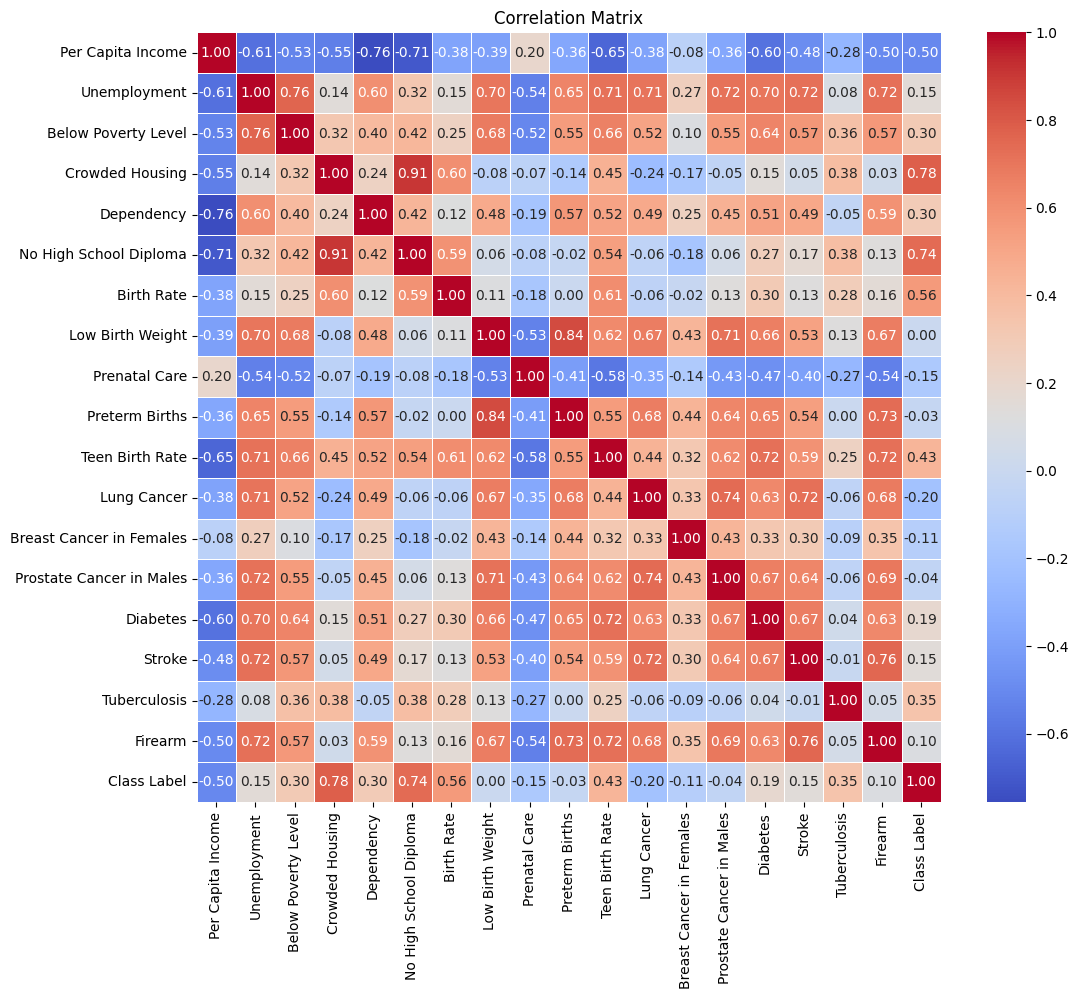

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dataset is your DataFrame
correlation_matrix = dataset.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


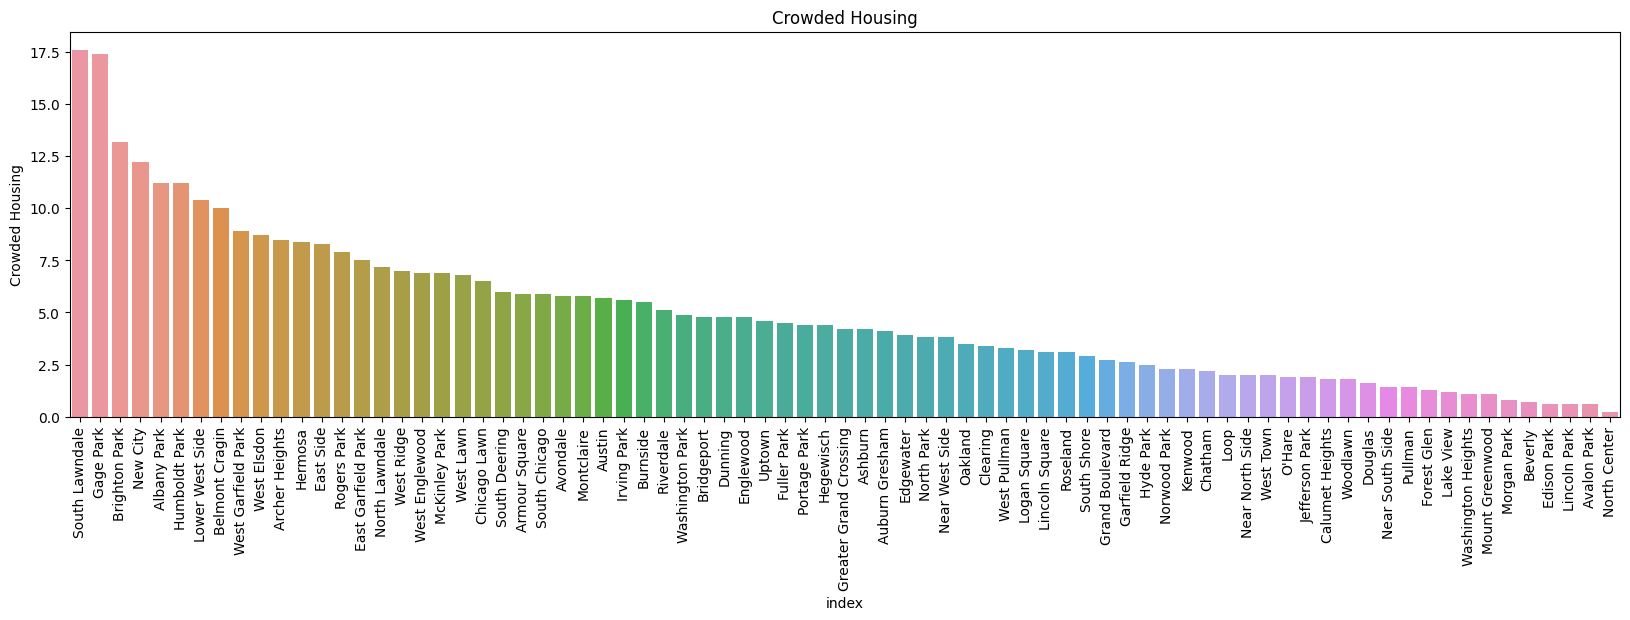

In [33]:
# Make bar chart of your assigned variable
plt.figure(figsize=(20, 5)) # Set figure size (if needed)
ax = sns.barplot(y = dataset['Crowded Housing'], x = dataset['Community Area'], data = dataset, errorbar = None) # Make bar chart
ax.set(title = 'Crowded Housing', ylabel = 'Crowded Housing', xlabel = 'index') # Set chart title and axis labels
ax.tick_params(axis='x', rotation=90) # Rotate x-axis labels (if needed)

[Text(0.5, 1.0, 'Crowded Housing'),
 Text(0, 0.5, 'Crowded Housing'),
 Text(0.5, 0, 'index')]

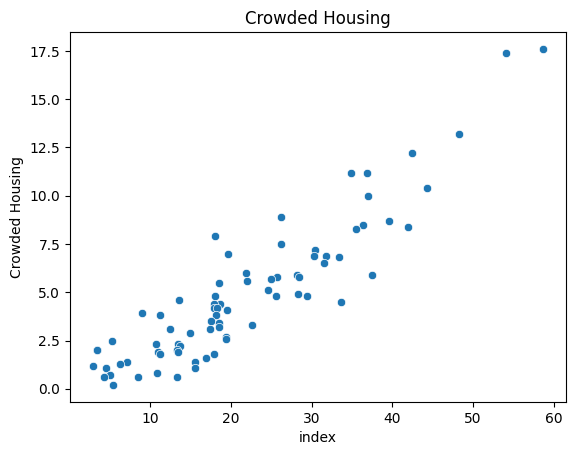

In [32]:
# Make scatter plot of your assigned variable
ax = sns.scatterplot(y = dataset['Crowded Housing'], x =dataset['No High School Diploma'], data = dataset) # Make scatter plot
ax.set(title = 'Crowded Housing', ylabel = 'Crowded Housing', xlabel = 'index') # Set chart title and axis labels

[Text(0.5, 1.0, 'Boxplot'), Text(0, 0.5, 'Crowded Housing')]

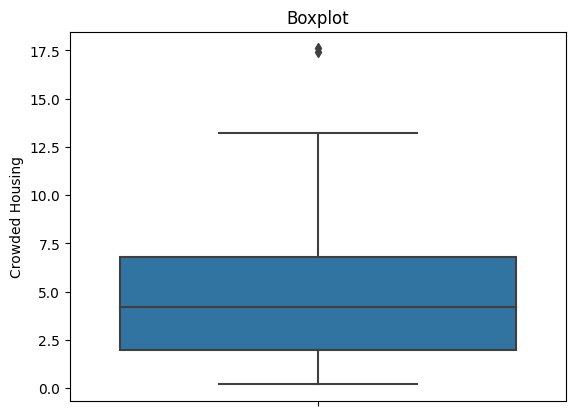

In [25]:
# Make box plot of your assigned variable
ax = sns.boxplot(y = dataset['Crowded Housing'], data = dataset) # Make box plot
ax.set(title = 'Boxplot', ylabel = 'Crowded Housing')

### **Part 4: Classification**
Training and Testing Decision Trees

**Create class label**

In [137]:
# Create class label for your assigned variable (based on mean value)
def create_class_label (row):
    mean_value = dataset['Crowded Housing'].mean()
    if row['Crowded Housing'] > mean_value:
        return 1 # value of assigned variable > mean value (high)
    return 0 # value of assigned variable <= mean value (low)

In [138]:
dataset['Class Label'] = dataset.apply(lambda row: create_class_label (row), axis = 1)
dataset.head()

,Community Area,Per Capita Income,Unemployment,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Birth Rate,Low Birth Weight,Prenatal Care,Preterm Births,Teen Birth Rate,Lung Cancer,Breast Cancer in Females,Prostate Cancer in Males,Diabetes,Stroke,Tuberculosis,Firearm,Class Label
29,South Lawndale,10697,11.5,28.1,17.6,33.1,58.7,19.5,7.6,85.1,9.6,77.5,15.9,13.2,32.7,65.0,37.3,7.9,8.6,1
62,Gage Park,12014,14.0,20.8,17.4,40.4,54.1,21.8,6.8,80.4,6.8,61.4,34.1,23.4,41.1,65.0,51.2,7.0,11.1,1
57,Brighton Park,13138,11.2,23.0,13.2,39.8,48.2,20.6,7.2,82.7,8.3,58.1,27.7,26.8,15.1,69.7,38.3,11.5,10.6,1
60,New City,12524,17.4,30.6,12.2,42.0,42.4,21.4,11.8,75.9,12.2,94.3,69.4,23.6,40.7,83.7,50.2,9.3,24.6,1
13,Albany Park,20355,9.0,17.1,11.2,32.1,34.9,18.3,8.5,73.3,8.3,44.5,36.9,22.9,13.1,72.1,39.1,16.8,5.3,1


In [225]:
# Assuming you have a single feature 'Crowded Housing' in your dataset
X = dataset[['No High School Diploma', 'Birth Rate']]
y = dataset['Class Label']

**Divide the dataset into a training set (75% of the data) and a test set (25% of the data).**

In [226]:
# Partition dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)  # (predictors, class, test size, random state)

**<u>Using the training set</u>, build a decision tree to predict the class label based on the predictors.**

In [227]:
# Build decision tree
model = DecisionTreeClassifier()
model.fit(x_train, y_train) # (predictors, class)

DecisionTreeClassifier()

[Text(0.4, 0.9, 'x[0] <= 19.55\nsamples = 57\nvalue = [36, 21]'),
 Text(0.13333333333333333, 0.7, 'x[0] <= 18.05\nsamples = 34\nvalue = [33, 1]'),
 Text(0.06666666666666667, 0.5, 'samples = 27\nvalue = [27, 0]'),
 Text(0.2, 0.5, 'x[0] <= 18.15\nsamples = 7\nvalue = [6, 1]'),
 Text(0.13333333333333333, 0.3, 'samples = 1\nvalue = [0, 1]'),
 Text(0.26666666666666666, 0.3, 'samples = 6\nvalue = [6, 0]'),
 Text(0.6666666666666666, 0.7, 'x[1] <= 15.55\nsamples = 23\nvalue = [3, 20]'),
 Text(0.4666666666666667, 0.5, 'x[0] <= 23.6\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4, 0.3, 'samples = 1\nvalue = [1, 0]'),
 Text(0.5333333333333333, 0.3, 'x[1] <= 12.1\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4666666666666667, 0.1, 'samples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.1, 'samples = 1\nvalue = [0, 1]'),
 Text(0.8666666666666667, 0.5, 'x[0] <= 28.35\nsamples = 20\nvalue = [1, 19]'),
 Text(0.8, 0.3, 'x[0] <= 28.25\nsamples = 9\nvalue = [1, 8]'),
 Text(0.7333333333333333, 0.1, 'samples = 8\nvalue = [0, 8]'

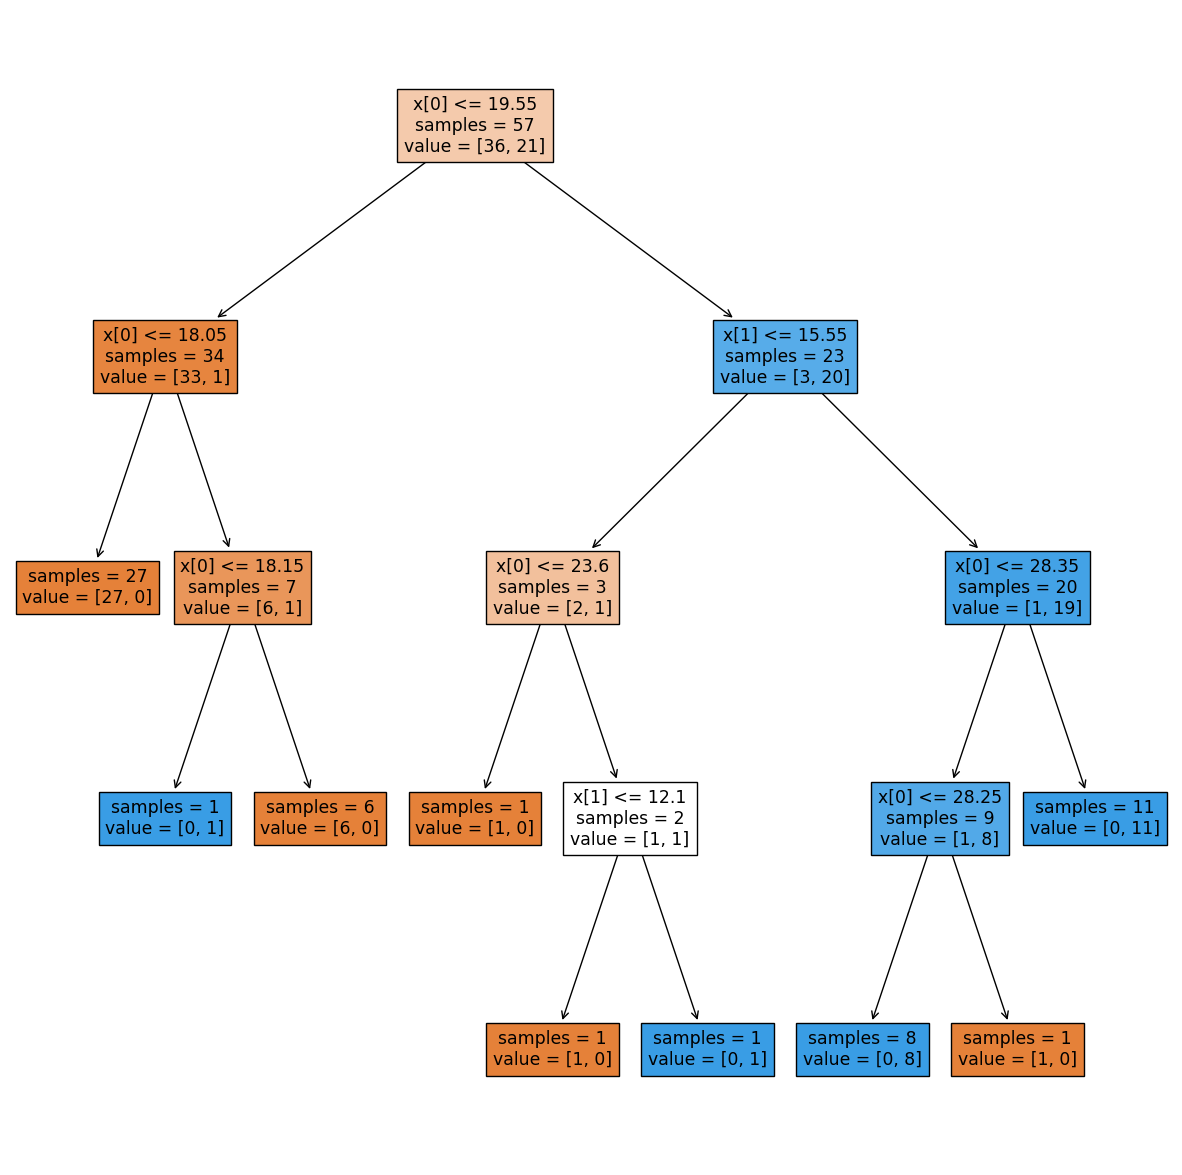

In [229]:
# Plot decision tree


plt.figure(figsize = (15, 15)) # Set figure size (if needed)
tree.plot_tree(model,      # feature_names indicates the names of the predictors
              #  class_names  ['Low', 'High'],     # class_names indicates the names of the classes
               filled = True, impurity = False)

**Evaluate the performance of this decision tree <u>on the test set</u>.**

In [230]:
# Predict class labels for test set
y_pred = model.predict(x_test)
print(y_pred) # Print predicted class labels

[1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0]


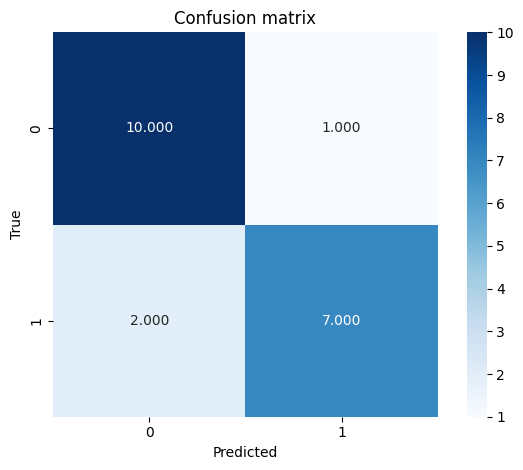

In [231]:
# Plot confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred) # Create confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues) # Plot confusion matrix
plt.ylabel('True') # Set y-axis label
plt.xlabel('Predicted') # Set x-axis label
plt.title('Confusion matrix') # Set chart title
plt.tight_layout()

In [232]:
# Compute evaluation metrics
from sklearn.metrics import accuracy_score, classification_report

print(metrics.accuracy_score(y_test, y_pred)) # Compute accuracy
print(classification_report(y_test, y_pred))

0.85
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.88      0.78      0.82         9

    accuracy                           0.85        20
   macro avg       0.85      0.84      0.85        20
weighted avg       0.85      0.85      0.85        20

